### **Сучасні підходи до задач класифікації та детекції зображень на прикладі моделей YOLO і Florence**

### YOLO 

Основна мета цього блоку - отримати базові знання та навички щодо аналізу зображень, зокрема детекції різного роду об'єктів. В рамках цього блоку ми розберемося, що таке YOLOv5, як її використовувати для виявлення об’єктів на різних зображеннях та відео.

YOLOv5 відноситься до одного з найкращих сімейств моделей для виявлення об’єктів із передовими показниками -  YOLO (You Only Look Once — “Ти дивишся тільки раз”). Першу модель YOLO випустив у 2016 році Джозеф Редмон, пізніше — YOLOv2 у 2017 та YOLOv3 у 2018 році. У 2020 році Редмон покинув проект через етичні питання у сфері комп’ютерного зору, а його роботу продовжив Алексей Бочковський, який створив YOLOv4 у 2020.
YOLOv5 — наступна модель у сімействі YOLO, яку випустила компанія Ultranytics у 2020 році, всього через кілька днів після YOLOv4.
Більш того, її не заявляють як нову версію з унікальними технологіями чи архітектурою — швидше, це розширення YOLOv3 на PyTorch та маркетингова стратегія Ultranytics, що прагне використати популярність сімейства YOLO.
Але не зважаючи на це YOLOv5 — це досить потужна модель для виявлення об’єктів, яка широко використовується в практичних задачах через її простоту та зручність, як ми побачимо у прикладах у цьому блоці

#### Архітектура моделі
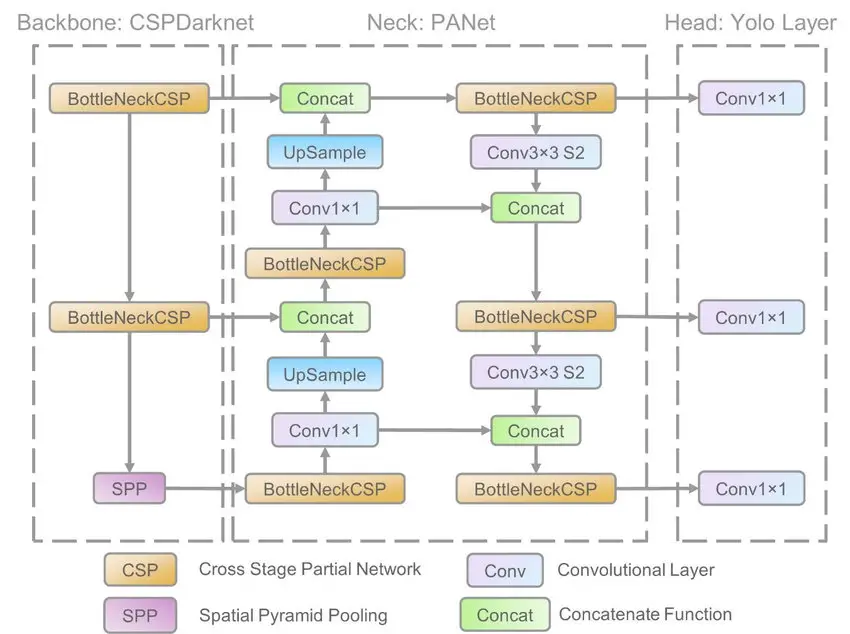

Сімейство моделей YOLO складається з трьох основних архітектурних блоків: 
    
    1) Backbone (основа) - Використовує CSPDarknet як основний блок для витягання ознак із зображень, що складається з мереж із часткових перекрестних рівнів. CSPDarknet є модифікацією класичної архітектури Darknet, створеної для високоефективного витягання ознак з зображень. Вона використовує концепцію Cross-Stage Partial (CSP), яка дозволяє розділити потік даних у мережі на кілька шляхів та знову їх об’єднати, що забезпечує більш зручну передачу ознак та зменшує кількість параметрів без втрати точності. Це сприяє кращій швидкодії та здатності до навчання. В процесі тренування, CSPDarknet аналізує зображення, виділяє з них особливості різних рівнів абстракції (різні розмірності та характери ознак). Це є критичним для подальшого виявлення об'єктів, що важливо у задачах, де потрібно знаходити об'єкти різних розмірів і форм. 
    
    2) Neck (шея) - застосовує PANet для побудови мережі пірамід ознак, що виконує агрегацію ознак і передає їх до голови для прогнозування. Після витягання ознак у CSPDarknet вони поступають у PANet (Path Aggregation Network). Це компонент, що створює піраміду ознак — ієрархічну структуру з ознаками різних рівнів, починаючи від дрібних деталей і закінчуючи глобальними контекстами. PANet об'єднує ознаки з різних рівнів: загальні проміжні ознаки із дрібними деталями, використовуючи пропускні шляхи і додаткові сполучення. Це дозволяє мережі краще розпізнавати об'єкти різної локалізації та масштабів, і підвищує точність детекції, оскільки вона враховує цілісну інформацію з кількох рівнів ознак.
    
    3) Head (голова) - це рівні, що формують результати на основі опорних зразків (якорів) для виявлення об’єктів. Фактично, якорі (anchors) представляють собою попередньо визначені фіксовані шаблони (блоки), які допомагають мережі швидко і ефективно локалізувати та класифікувати об'єкти на зображенні. На кожному рівні (після витягання ознак і побудови піраміди) мережа прогнозує для кожного якора такі параметри: координати об’єкта, його розмір і клас (ймовірність приналежності до цього класу). Це дозволяє мережі швидко знайти й класифікувати об'єкти незалежно від їх розміру й положення. 

Крім цього, в YOLOv5 застосовується Leaky ReLU і сигмоїд для активації, а також SGD і ADAM як варіанти оптимізаторів. В якості функції втрат використовується бінарна крос-ентропію з логітами.

YOLOv5 підтримує різні за складністю архітектури моделей


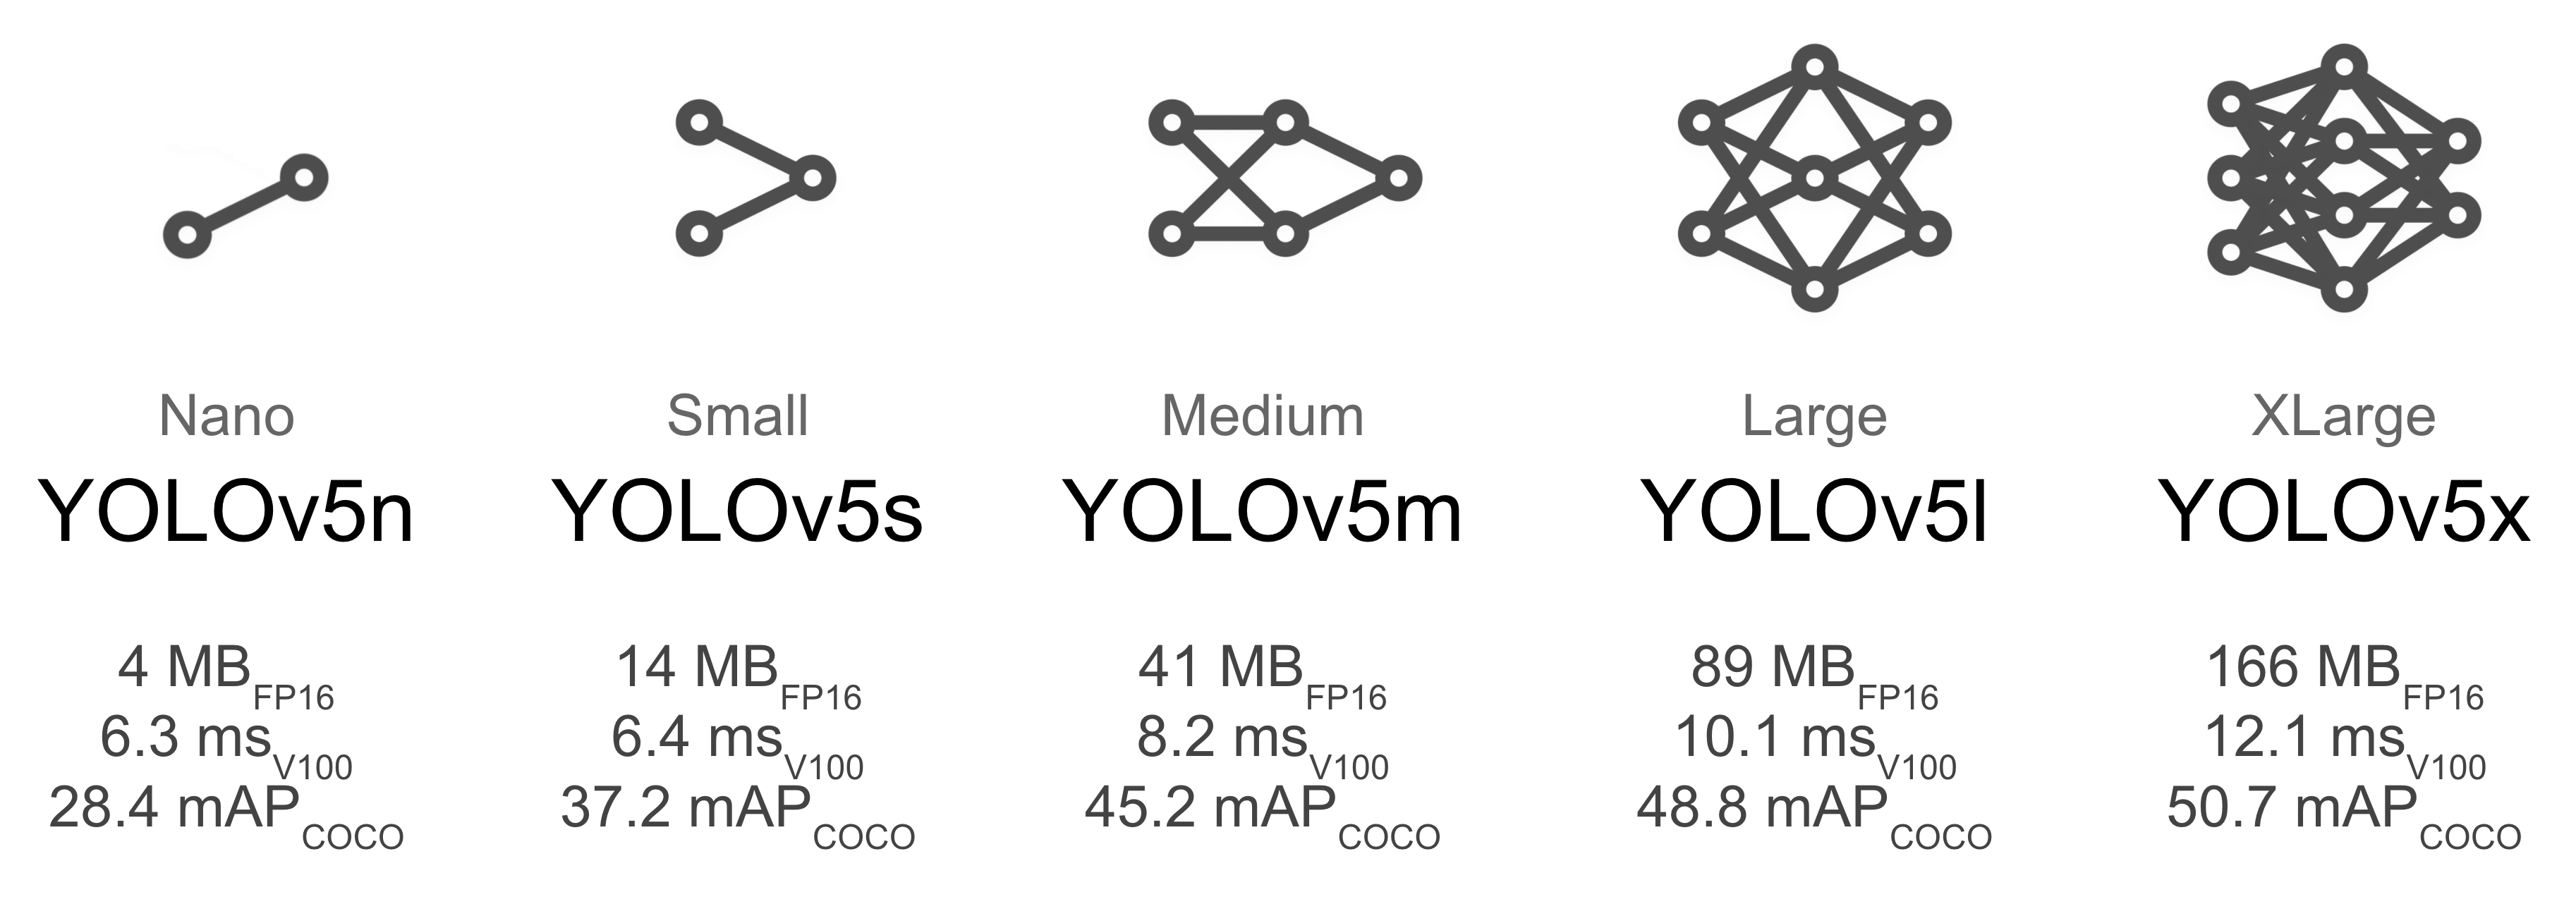

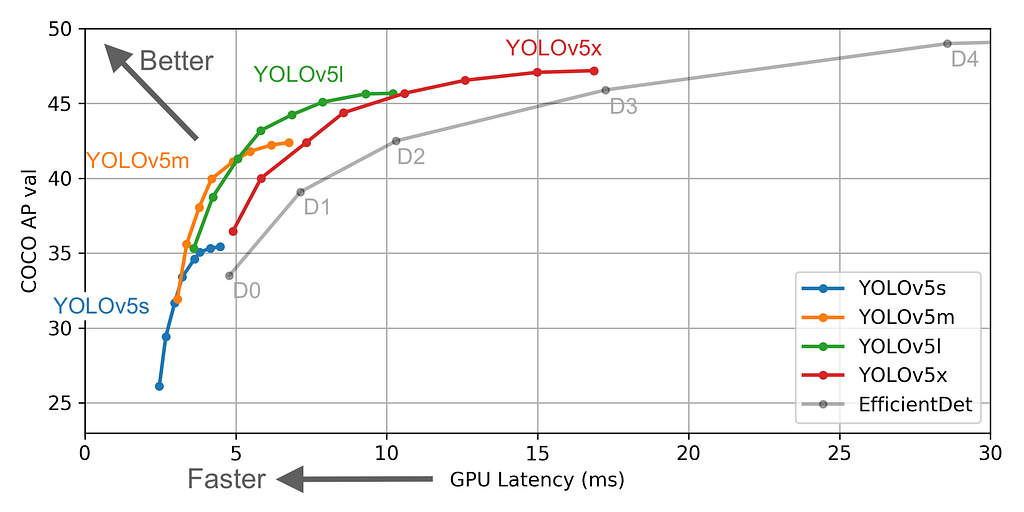

#### Встановлення та налаштування YOLO



In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [6]:
%cd yolov5


[WinError 2] The system cannot find the file specified: 'yolov5'
d:\NUBIP\лаборатории\crators\course\notebooks\yolov5
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [12]:
!pip install -r requirements.txt  --user

In [21]:
import torch
import torchvision
print(f'Torch: {torch.__version__}')
print(f'Torchvision: {torchvision.__version__}')


Torch: 2.0.1+cpu
Torchvision: 0.15.2+cu118


Модель  YOLOv5, завантажена з репозиторію вже преднавчена на розпізнавання 80 різних класів і може бути використана для прогнозування за допомогою однієї команди, синтаксис та параметри наведені нижче:

!python <шлях до файла detect.py> --source <шлях до зображення/відео/відео з YouTube> --weights <шлях до файлу з вагами> --conf <Мінімальне значення довіри>

Параметри:

<шлях до detect.py>: цей файл ініціалізує наш детектор і містить код для отримання передбачень.

<шлях до зображення/відео/відео з YouTube>: тут вказується шлях до файлу або посилання, на яких потрібно виконати детекцію.

<шлях до ваг>: це файл вагів, модель, яку використовують для виявлення об'єктів, це може бути як власна модель, так і модель навчена на відкритих наборах даних.
<Мінімальне значення довіри>: цільове значення для ймовірності, з якою модель вважає передбачення релевантним.

In [22]:
!python detect.py --source data/images/bus.jpg --weights yolov5m.pt --conf 0.25

detect: weights=['yolov5m.pt'], source=data/images/bus.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-425-g85acef3a Python-3.9.7 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
image 1/1 D:\NUBIP\\crators\course\notebooks\yolov5\data\images\bus.jpg: 640x480 4 persons, 1 bus, 36.3ms
Speed: 0.0ms pre-process, 36.3ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


In [23]:

#!pip uninstall torch -y
# with gpu support
#!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 -f https://download.pytorch.org/whl/torch_stable.html -y
# with cpu support
#!pip install torch==2.0.1+cpu torchvision==0.15.2+cpu -f https://download.pytorch.org/whl/torch_stable.html

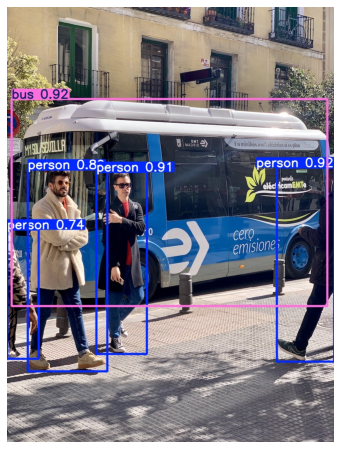

In [37]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('runs/detect/exp3/bus.jpg')
# Convert BGR (OpenCV default) to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8)) 
plt.imshow(img_rgb)
plt.axis('off')  # Optional: turn off axes
plt.show()



### Тренування моделі на власних даних

#### Загальна процедура тренування власної моделі 
<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>





####  Базові правила для досягнення найкращих результатів навчання з використанням YOLOv5

Зазвичай хороші результати можна отримати без внесення змін у модель або налаштування навчання, за умови, що дані достатньо великі та правильно розмічені. Існують типові кроки для покращення результатів, але рекомендується спершу тренувати модель із усіма стандартними налаштуваннями, перед тим як розглядати будь-які зміни. Це допомагає встановити базовий рівень продуктивності та виявити області для покращення.

Вимоги до даних 
Рекомендується мати не менше ніж 1500 зображень на клас.
Об’єкти на клас. Рекомендується мати не менше ніж 10 000 позначених об’єктів для кожного класу.

Різноманітність зображень. 

Необхідно, щоб зображення були репрезентативними для реального середовища застосування. Для практичних сценаріїв рекомендується використовувати знімки в різний час доби, пори року, погодні умови, різну освітленість, різні ракурси, з різних джерел (згенерованих з Інтернету, зібраних локально, з різних камер тощо).

Послідовність позначень. 
Всі об’єкти на всіх зображеннях повинні мати коректні позначки. Часткове або недостовірне маркування не дасть належного результату.

Точність позначень. 
Лейбли повинні щільно обгортати об’єкт, без зазорів. Об’єкти не повинні бути без мітки або з неповними рамками.

Фони (background images). 
Це зображення без об’єктів, які додають до датасету для зменшення кількості хибних спрацювань (False Positives, FP). Рекомендується додавати приблизно 0-10% фонового матеріалу. Для фонових зображень ніякі позначки не потрібні.


#### Вибір складності моделі

Більш складні моделі, такі як YOLOv5x зазвичай дають кращі результати, але мають більше параметрів, потребують більше даних для навчання, пам’яті для CUDA під час тренування і працюють повільніше. Для мобільних застосунків рекомендуємо YOLOv5s або YOLOv5m, для хмарних рішень — YOLOv5l або YOLOv5x. Повну таблицю порівнянь всіх моделей дивіться у нашому README.  

Починайте з попередньо натренованих вагів. Вкажіть назву моделі у аргументі --weights. Моделі автоматично завантажуються з останнього релізу YOLOv5.  

Наприклад
python train.py --data custom.yaml --weights yolov5s.pt
python train.py --data custom.yaml --weights yolov5m.pt
python train.py --data custom.yaml --weights yolov5l.pt
python train.py --data custom.yaml --weights yolov5x.pt
python train.py --data custom.yaml --weights custom_pretrained.pt


Тренування нової моделі рекомендується для великих наборів даних, для цього вказуйте архітектуру моделі у файлі YAML і залишайте --weights порожнім:

python train.py --data custom.yaml --weights '' --cfg yolov5s.yaml
python train.py --data custom.yaml --weights '' --cfg yolov5m.yaml
python train.py --data custom.yaml --weights '' --cfg yolov5l.yaml
python train.py --data custom.yaml --weights '' --cfg yolov5x.yaml


#### Рекомендовані налаштування тренування
Перед будь-якими змінами рекомендується спочатку тренувати модель із стандартними налаштуваннями, щоб визначити базову продуктивність. Повний список налаштувань міститься в train.py.  

Епохи: 
Рекомендовано починати з 300 епох. Якщо модель переобучається раніше — зменшуйте кількість. Якщо після 300 епох не відбувається переобучення — тренуйте довше, наприклад, 600 або 1200.
Розмір зображення: 
Для тренувань у COCO стандартний розмір — 640x640, але для кращої роботи з дрібними об'єктами слід використовувати більший розмір, наприклад, 1280x1280. Це також важливо для точності тестування.
Розмір батчу: 
Використовуйте максимально можливий розмір батчу відповідно до потужності вашого апаратного забезпечення. Малий розмір зменшує якість нормалізації, тож його слід уникати.
Швидкість навчання: 
За замовчуванням використовується стандартний графік. Для швидшого сходження можна включити --cos-lr (косінусне зниження швидкості).
Аугментація даних: 
YOLOv5 підтримує різні техніки аугментації, зокрема mosaic. В останніх епохах можна вимкнути mosaic через --close-mosaic 10, щоб стабілізувати тренування.
Гіперпараметри: 
За замовчуванням використовуються стандартні налаштування в hyp.scratch-low.yaml. Збільшення рівня аугментації зменшує переобучення і дозволяє тренувати довше. Для автоматичної оптимізації гіперпараметрів доступна методика Hyperparameter Evolution.
Мішане точність: 
Вмикайте --amp для швидшого тренування та зменшення споживання пам’яті без втрати точності.
Рання зупинка: 
--patience 50 — зупиняє тренування, якщо метрики не покращуються протягом 50 епох.

 #### Підбір гіперпараметрів для YOLOv5 за допомогою генетичного алгоритму (GA). 
 
Еволюційний підбір гіперпараметрів — це метод їхнього автоматичного оптимізування, який базується на принципах генетичних алгоритмів.

Гіперпараметри в машинному навчанні керують різними аспектами тренування моделі, і пошук їх оптимальних значень може бути складним завданням. Традиційні методи, такі як grid search, швидко стають непридатними через високий розмір пошукового простору, невідомі кореляції між параметрами та високу вартість оцінки якості моделі для кожної точки. Це робить генетичні алгоритми привабливим інструментом для пошуку оптимальних гіперпараметрів.

1. Ініціалізація гіперпараметрів

У YOLOv5 є близько 30 гіперпараметрів, які відповідають за різні налаштування тренування. Вони визначені у файлах \*.yaml у папці /data/hyps. Належні початкові значення з високою ймовірністю створять кращі кінцеві результати. Тому важливо правильно їх ініціалізувати перед початком еволюційного пошуку. За потрібності, можна використовувати стандартні значення, оптимізовані для тренування YOLOv5 на датасеті COCO з нуля.

Приклад налаштувань:
lr0: 0.01 # початкова швидкість навчання
lrf: 0.2 # кінцева швидкість за циклом OneCycleLR
momentum: 0.937 # повзунок імпульсу/бета1 для Adam
weight_decay: 0.0005 # коефіцієнт зменшення ваг
warmup_epochs: 3.0 # кількість епох розігріву
warmup_momentum: 0.8 # початковий імпульс епох розігріву
warmup_bias_lr: 0.1 # початковий LR для зміщення
box: 0.05 # вагомість втрат по координатах
cls: 0.5 # вагомість втрат класифікації
obj: 1.0 # вагомість втрат об’єкта
iou_t: 0.20 # поріг IoU для тренування

2. Визначення функції підбору (fitness)

Функція fitness — це скалярна величина, яку ми прагнемо максимізувати. В YOLOv5 вона за замовчуванням — комбіноване зважене значення метрик: mAP@0.5 (з вагою 0,1) та mAP@0.5:0.95 (з вагою 0,9). Цю функцію можна змінювати залежно від цілей.

3. Пошук параметрів 

Процес пошуку параметрів  проводиться навколо базового сценарію, який ми прагнемо покращити. У цьому прикладі базовий сценарій — це тонке налаштування COCO128 протягом 10 епох із використанням попередньо натренованої моделі YOLOv5s. Команда для тренування базового сценарію виглядає так:

python train.py --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache --evolve


За замовчуванням еволюційний пошук триває 300 поколінь. Кількість поколінь можна змінити, додавши аргумент --evolve, наприклад:
python train.py --evolve 1000

Результати еволюції виводяться у вигляді таблиці, наприклад:

 Найкраще покоління: 287
 Останнє покоління: 300
 Метрики: точність (precision), викривлення (recall), mAP@0.5, mAP@0.5:0.95, втрати по координатах, об'єктах, класах
    0.54634, 0.55625, 0.58201, 0.33665, 0.056451, 0.042892, 0.013441

Витягнуті найкращі значення гіперпараметрів, наприклад lr0: 0.01, lrf: 0.2, momentum: 0.937, вказують на оптимальні налаштування для досягнення найвищої точності. 

Після завершення пошуку результати візуалізуються у форматі evolve.png, де кожен підграфік відображає залежність функції фітнесу від гіперпараметру.


####  Приклад результатів детекції кратерів
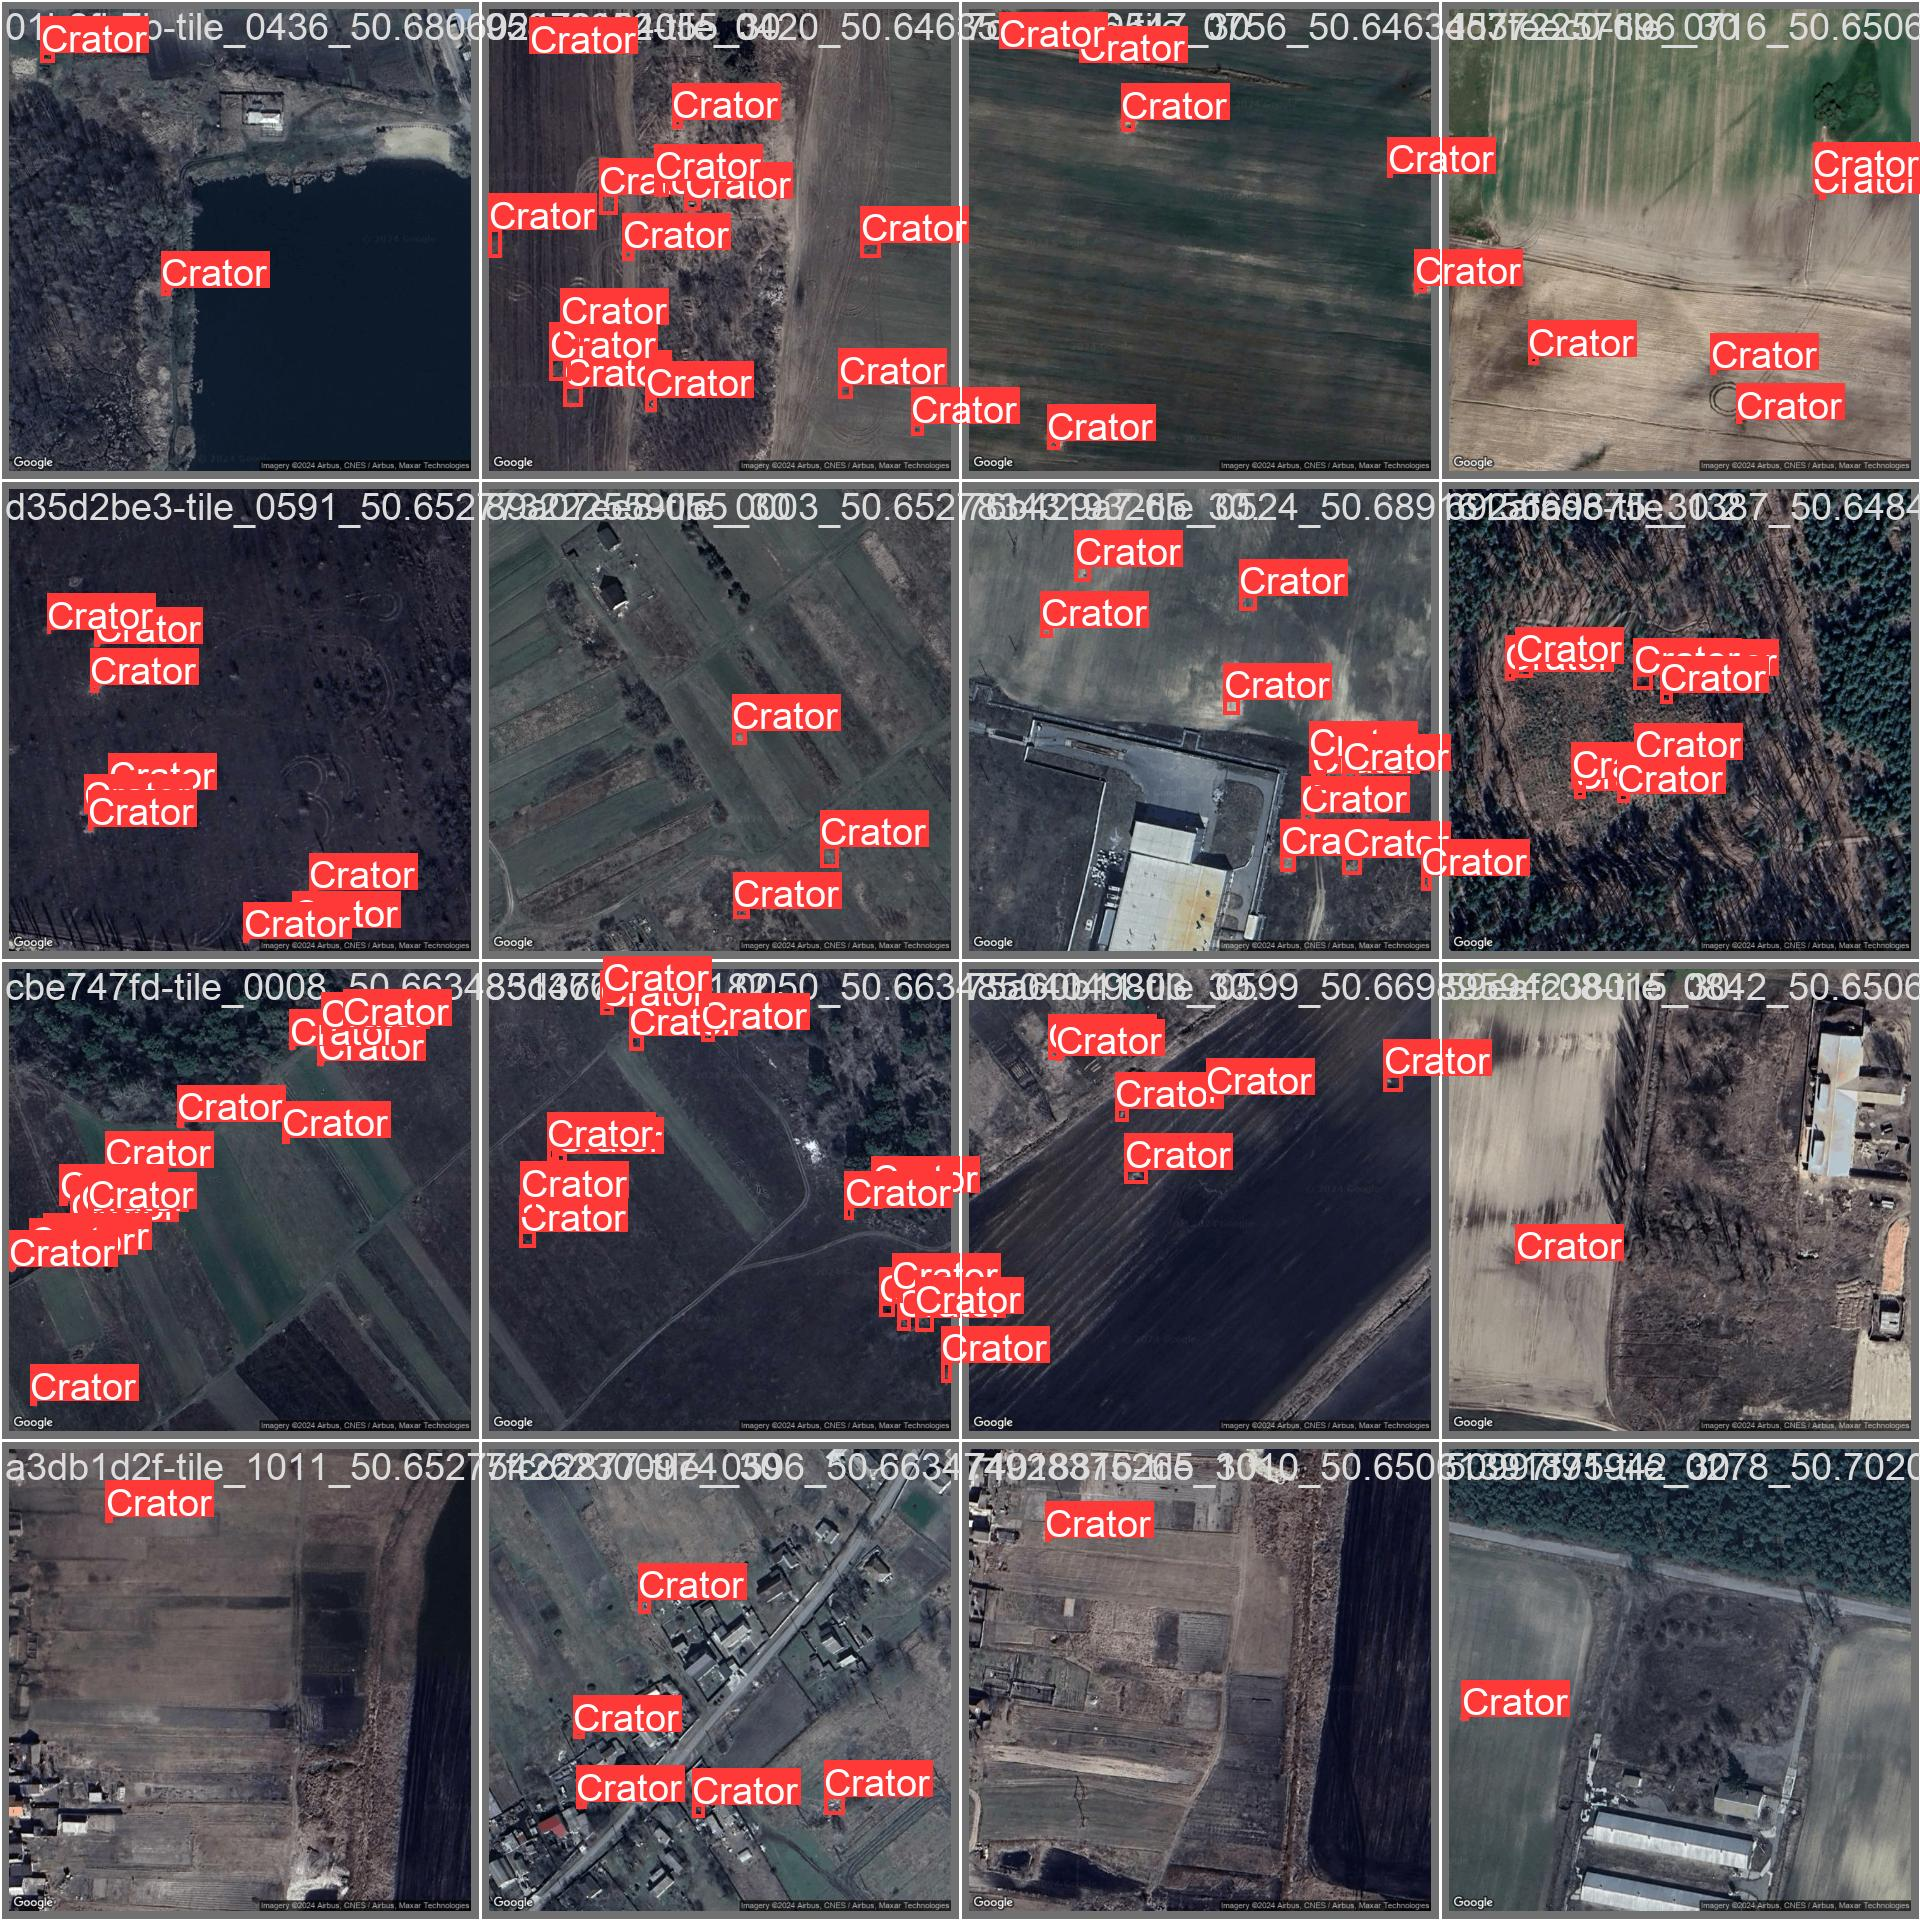


### Agricultural Land Classification using Florence Model



In [5]:
# Install required packages
#!pip install transformers==4.37.2 torchvision pillow requests 
#!pip install google-cloud-storage
#!pip install google-auth
!python -m pip install tensorflow --user

  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached termcolor-3.1.0-py3-none-any.whl (7.7 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached grpcio-1.74.0-cp39-cp39-win_amd64.whl (4.5 MB)
  Using cached markdown-3.8.2-py3-none-any.whl (106 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
# Install required packages
import torch
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def load_florence_model():
    """
    Load Florence-2 model with error handling for common issues
    """
    try:
        # Try Florence-2-large first
        model_name = "microsoft/Florence-2-large"
        print("Loading Florence-2-large model...")
        processor = AutoProcessor.from_pretrained(model_name, trust_remote_code=True)

        # Load model with torch_dtype specification to avoid issues
        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            trust_remote_code=True,
            torch_dtype=torch.float16 if device == "cuda" else torch.float32,
            device_map="auto" if device == "cuda" else None
        )

        if device == "cpu":
            model = model.to(device)

        print("Florence-2-large loaded successfully!")
        return processor, model, model_name

    except Exception as e:
        print(f"Error loading Florence-2-large: {e}")
        print("Trying Florence-2-base...")

        try:
            # Fallback to Florence-2-base
            model_name = "microsoft/Florence-2-base"
            processor = AutoProcessor.from_pretrained(model_name, trust_remote_code=True)

            model = AutoModelForCausalLM.from_pretrained(
                model_name,
                trust_remote_code=True,
                torch_dtype=torch.float16 if device == "cuda" else torch.float32,
                device_map="auto" if device == "cuda" else None
            )

            if device == "cpu":
                model = model.to(device)

            print("Florence-2-base loaded successfully!")
            return processor, model, model_name

        except Exception as e2:
            print(f"Error loading Florence-2-base: {e2}")
            print("Falling back to CLIP model for agricultural classification...")

            # Fallback to CLIP as in original code
            from transformers import CLIPProcessor, CLIPModel
            model_name = "openai/clip-vit-large-patch14"
            processor = CLIPProcessor.from_pretrained(model_name)
            model = CLIPModel.from_pretrained(model_name).to(device)
            print("CLIP model loaded as fallback!")
            return processor, model, model_name

Using device: cuda


In [8]:
processor, model, model_name = load_florence_model()

def load_image(image_path):
    """
    Load image from local path or URL
    """
    if image_path.startswith('http'):
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content))
    else:
        image = Image.open(image_path)

    # Convert to RGB if necessary
    if image.mode != 'RGB':
        image = image.convert('RGB')

    return image

def classify_agricultural_land(image, confidence_threshold=0.6):
    """
    Classify if image contains agricultural/cultivated lands
    Works with both Florence-2 and CLIP models
    """
    if "Florence" in model_name:
        return classify_with_florence(image, confidence_threshold)
    else:
        return classify_with_clip(image, confidence_threshold)

def classify_with_florence(image, confidence_threshold=0.6):
    """
    Classify using Florence-2 model
    """
    # Task for detailed captioning
    task_prompt = "<MORE_DETAILED_CAPTION>"

    # Process the image
    inputs = processor(text=task_prompt, images=image, return_tensors="pt")

    # Move inputs to device
    for key in inputs:
        if torch.is_tensor(inputs[key]):
            inputs[key] = inputs[key].to(device)

    # Generate caption
    with torch.no_grad():
        generated_ids = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_new_tokens=1024,
            do_sample=False,
            num_beams=3
        )

    # Decode the generated caption
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))
    caption = parsed_answer[task_prompt]

    # Keywords for agricultural/cultivated land detection
    agricultural_keywords = [
        'farm', 'field', 'crop', 'agriculture', 'cultivated', 'plantation',
        'farmland', 'agricultural', 'harvest', 'planted', 'farming', 'rural',
        'vineyard', 'orchard', 'pasture', 'meadow', 'wheat', 'corn', 'rice',
        'vegetables', 'cultivation', 'tilled', 'irrigated', 'greenhouse'
    ]

    # Count agricultural keywords in caption
    caption_lower = caption.lower()
    found_keywords = [keyword for keyword in agricultural_keywords if keyword in caption_lower]

    # Calculate confidence based on keyword matches
    keyword_score = len(found_keywords) / len(agricultural_keywords)

    # Determine classification
    is_agricultural = len(found_keywords) > 0
    confidence = min(keyword_score * 2, 1.0)  # Scale confidence

    return {
        'is_agricultural': is_agricultural,
        'confidence': confidence,
        'caption': caption,
        'found_keywords': found_keywords,
        'classification': 'Agricultural/Cultivated Land' if is_agricultural else 'Non-Agricultural Land'
    }

def classify_with_clip(image, confidence_threshold=0.6):
    """
    Classify using CLIP model (fallback)
    """
    # Define prompts for classification
    prompts = [
        "This is an aerial view of agricultural fields, farmland, or cultivated crops",
        "This is an aerial view of urban area, forest, water, or non-agricultural land"
    ]

    inputs = processor(text=prompts, images=image, return_tensors="pt", padding=True)

    # Move inputs to device
    for key in inputs:
        if torch.is_tensor(inputs[key]):
            inputs[key] = inputs[key].to(device)

    # Calculate logits and probabilities
    with torch.no_grad():
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)

    # Get results
    agricultural_prob = probs[0][0].item()
    non_agricultural_prob = probs[0][1].item()

    is_agricultural = agricultural_prob > non_agricultural_prob
    confidence = max(agricultural_prob, non_agricultural_prob)

    return {
        'is_agricultural': is_agricultural,
        'confidence': confidence,
        'caption': f"Agricultural probability: {agricultural_prob:.2%}, Non-agricultural probability: {non_agricultural_prob:.2%}",
        'found_keywords': [],
        'classification': 'Agricultural/Cultivated Land' if is_agricultural else 'Non-Agricultural Land'
    }

def enhanced_agricultural_detection(image):
    """
    Enhanced detection - works with both Florence-2 and CLIP models
    """
    if "Florence" in model_name:
        return enhanced_florence_detection(image)
    else:
        return enhanced_clip_detection(image)

def enhanced_florence_detection(image):
    """
    Enhanced detection using multiple Florence-2 tasks
    """
    results = {}

    try:
        # Task 1: Detailed captioning
        task1 = "<MORE_DETAILED_CAPTION>"
        inputs1 = processor(text=task1, images=image, return_tensors="pt")

        # Move inputs to device
        for key in inputs1:
            if torch.is_tensor(inputs1[key]):
                inputs1[key] = inputs1[key].to(device)

        with torch.no_grad():
            generated_ids1 = model.generate(
                input_ids=inputs1["input_ids"],
                pixel_values=inputs1["pixel_values"],
                max_new_tokens=1024,
                do_sample=False,
                num_beams=3
            )

        generated_text1 = processor.batch_decode(generated_ids1, skip_special_tokens=False)[0]
        parsed_answer1 = processor.post_process_generation(generated_text1, task=task1, image_size=(image.width, image.height))
        detailed_caption = parsed_answer1[task1]

        # Task 2: Object detection for agricultural objects
        task2 = "<OD>"
        inputs2 = processor(text=task2, images=image, return_tensors="pt")

        # Move inputs to device
        for key in inputs2:
            if torch.is_tensor(inputs2[key]):
                inputs2[key] = inputs2[key].to(device)

        with torch.no_grad():
            generated_ids2 = model.generate(
                input_ids=inputs2["input_ids"],
                pixel_values=inputs2["pixel_values"],
                max_new_tokens=1024,
                do_sample=False,
                num_beams=3
            )

        generated_text2 = processor.batch_decode(generated_ids2, skip_special_tokens=False)[0]
        parsed_answer2 = processor.post_process_generation(generated_text2, task=task2, image_size=(image.width, image.height))
        detected_objects = parsed_answer2.get(task2, {})

    except Exception as e:
        print(f"Error in Florence processing: {e}")
        # Fallback to simple captioning only
        return classify_with_florence(image)

    # Analyze results
    agricultural_keywords = [
        'farm', 'field', 'crop', 'agriculture', 'cultivated', 'plantation',
        'farmland', 'agricultural', 'harvest', 'planted', 'farming', 'rural',
        'vineyard', 'orchard', 'pasture', 'meadow', 'wheat', 'corn', 'rice',
        'vegetables', 'cultivation', 'tilled', 'irrigated', 'greenhouse', 'barn'
    ]

    # Check caption for keywords
    caption_lower = detailed_caption.lower()
    found_keywords = [keyword for keyword in agricultural_keywords if keyword in caption_lower]

    # Check detected objects
    detected_labels = []
    if 'labels' in detected_objects:
        detected_labels = [label.lower() for label in detected_objects['labels']]
        agricultural_objects = [label for label in detected_labels if any(keyword in label for keyword in agricultural_keywords)]
    else:
        agricultural_objects = []

    # Calculate final score
    caption_score = len(found_keywords) / max(len(agricultural_keywords), 1)
    object_score = len(agricultural_objects) / max(len(detected_labels), 1) if detected_labels else 0

    final_confidence = (caption_score + object_score) / 2
    is_agricultural = len(found_keywords) > 0 or len(agricultural_objects) > 0

    return {
        'is_agricultural': is_agricultural,
        'confidence': final_confidence,
        'classification': 'Agricultural/Cultivated Land' if is_agricultural else 'Non-Agricultural Land',
        'detailed_caption': detailed_caption,
        'found_keywords': found_keywords,
        'detected_objects': detected_labels,
        'agricultural_objects': agricultural_objects
    }

def enhanced_clip_detection(image):
    """
    Enhanced detection using CLIP with multiple prompts
    """
    # Multiple detailed prompts for better classification
    agricultural_prompts = [
        "satellite image of aerial view of agricultural fields and farmland",
        "satellite image of crops and cultivated land",
        "farm fields with planted crops from above",
        "satellite image of agricultural landscape with farming activities"
        # "rural farmland and agricultural areas"
    ]

    non_agricultural_prompts = [
        "satellite image of urban cityscape and buildings",
        "satellite image of natural forest and wilderness areas",
        "satellite image of water bodies like lakes and rivers",
        "satellite image of desert or barren land without cultivation",
        "satellite image of residential areas and suburban neighborhoods"
    ]

    all_prompts = agricultural_prompts + non_agricultural_prompts

    inputs = processor(text=all_prompts, images=image, return_tensors="pt", padding=True)

    # Move inputs to device
    for key in inputs:
        if torch.is_tensor(inputs[key]):
            inputs[key] = inputs[key].to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)

    # Calculate agricultural vs non-agricultural scores
    agricultural_scores = probs[0][:len(agricultural_prompts)]
    non_agricultural_scores = probs[0][len(agricultural_prompts):]

    avg_agricultural = agricultural_scores.mean().item()
    avg_non_agricultural = non_agricultural_scores.mean().item()

    is_agricultural = avg_agricultural > avg_non_agricultural
    confidence = max(avg_agricultural, avg_non_agricultural)

    # Create detailed caption from probabilities
    best_agricultural_idx = agricultural_scores.argmax().item()
    best_non_agricultural_idx = non_agricultural_scores.argmax().item()

    if is_agricultural:
        detailed_caption = f"Best match: {agricultural_prompts[best_agricultural_idx]} (confidence: {agricultural_scores[best_agricultural_idx]:.2%})"
    else:
        detailed_caption = f"Best match: {non_agricultural_prompts[best_non_agricultural_idx]} (confidence: {non_agricultural_scores[best_non_agricultural_idx]:.2%})"

    return {
        'is_agricultural': is_agricultural,
        'confidence': confidence,
        'classification': 'Agricultural/Cultivated Land' if is_agricultural else 'Non-Agricultural Land',
        'detailed_caption': detailed_caption,
        'found_keywords': [],
        'detected_objects': [],
        'agricultural_objects': []
    }

def visualize_results(image, results):
    """
    Visualize the classification results
    """
    plt.figure(figsize=(12, 8))

    # Show image
    plt.subplot(2, 1, 1)
    plt.imshow(image)
    plt.title(f"Classification: {results['classification']}\nConfidence: {results['confidence']:.2%}")
    plt.axis('off')

    # Show analysis details
    plt.subplot(2, 1, 2)
    plt.text(0.1, 0.9, f"Detailed Caption:", fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    plt.text(0.1, 0.8, results['detailed_caption'], fontsize=10, wrap=True, transform=plt.gca().transAxes)

    if results['found_keywords']:
        plt.text(0.1, 0.6, f"Agricultural Keywords Found:", fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
        plt.text(0.1, 0.5, ', '.join(results['found_keywords']), fontsize=10, transform=plt.gca().transAxes)

    if 'agricultural_objects' in results and results['agricultural_objects']:
        plt.text(0.1, 0.3, f"Agricultural Objects Detected:", fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
        plt.text(0.1, 0.2, ', '.join(results['agricultural_objects']), fontsize=10, transform=plt.gca().transAxes)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

Loading Florence-2-large model...


C:\Users\rrudenskyi\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

C:\Users\rrudenskyi\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rrudenskyi\.cache\huggingface\hub\models--microsoft--Florence-2-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


processing_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py: 0.00B [00:00, ?B/s]

Error loading Florence-2-large: This modeling file requires the following packages that were not found in your environment: flash_attn, einops. Run `pip install flash_attn einops`
Trying Florence-2-base...


preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

C:\Users\rrudenskyi\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rrudenskyi\.cache\huggingface\hub\models--microsoft--Florence-2-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


processing_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_florence2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py: 0.00B [00:00, ?B/s]

Error loading Florence-2-base: This modeling file requires the following packages that were not found in your environment: flash_attn, einops. Run `pip install flash_attn einops`
Falling back to CLIP model for agricultural classification...


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

C:\Users\rrudenskyi\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rrudenskyi\.cache\huggingface\hub\models--openai--clip-vit-large-patch14. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

CLIP model loaded as fallback!


In [12]:
import os
IMG_DIR = 'test_image'

=== Agricultural Land Classification with Florence-2 ===

=== Processing image test_image\008f2fae-tile_0552_50.65919560966821_30.22625380605875.png ===

Loading image...
Analyzing image for agricultural content...

=== RESULTS ===
Classification: Agricultural/Cultivated Land
Confidence: 20.26%
Is Agricultural: True

Detailed Caption: Best match: satellite image of agricultural landscape with farming activities (confidence: 56.63%)


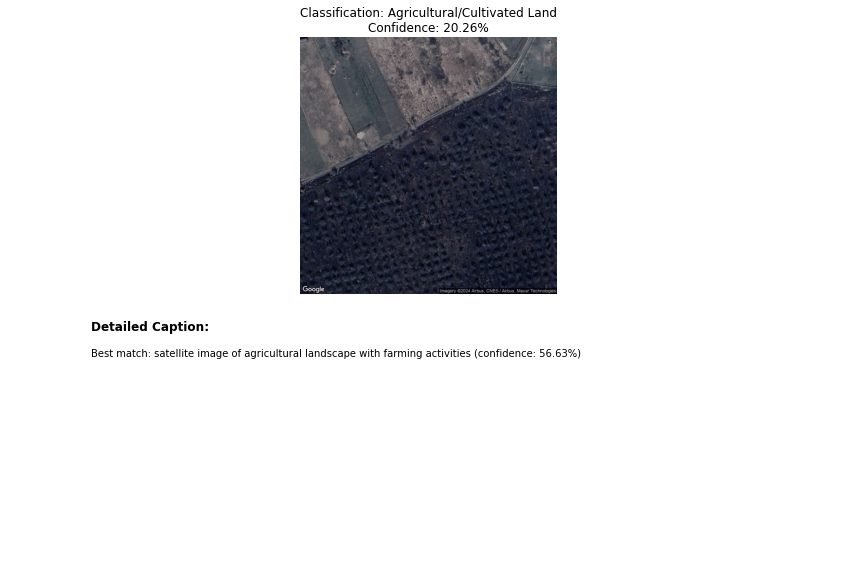

=== Processing image test_image\605500e0-tile_0424_50.65491842690749_30.216155264539395.png ===

Loading image...
Analyzing image for agricultural content...

=== RESULTS ===
Classification: Agricultural/Cultivated Land
Confidence: 16.25%
Is Agricultural: True

Detailed Caption: Best match: satellite image of agricultural landscape with farming activities (confidence: 47.72%)


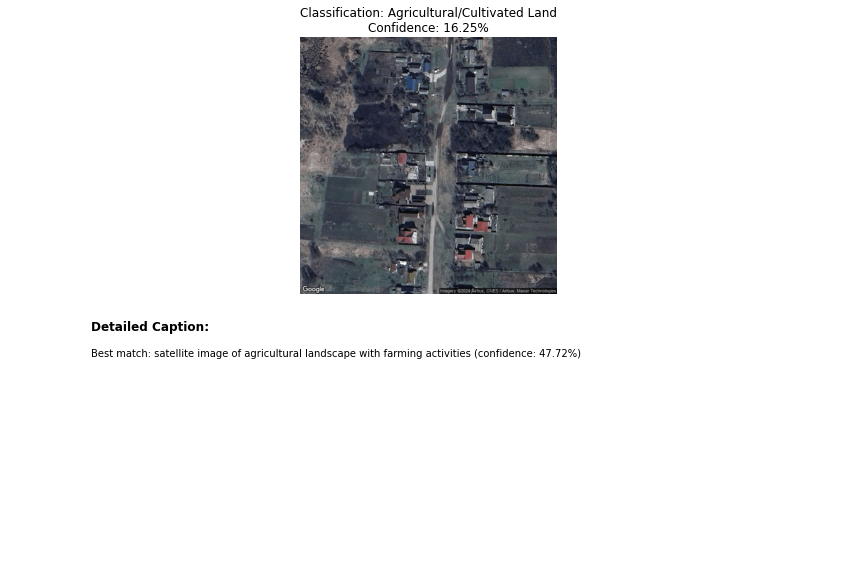

=== Processing image test_image\61a19573-tile_0590_50.650632879024506_30.229619986208597.png ===

Loading image...
Analyzing image for agricultural content...

=== RESULTS ===
Classification: Agricultural/Cultivated Land
Confidence: 21.45%
Is Agricultural: True

Detailed Caption: Best match: satellite image of agricultural landscape with farming activities (confidence: 72.16%)


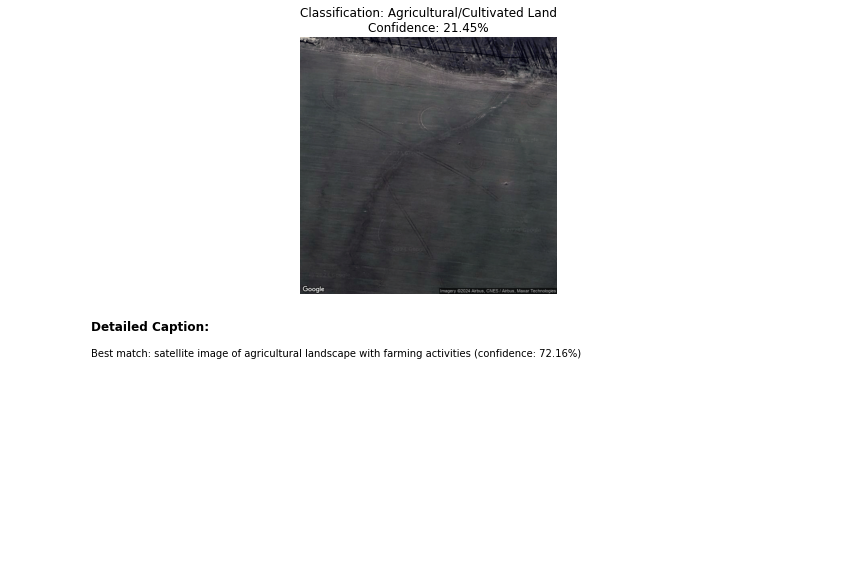

=== Processing image test_image\74018816-tile_1010_50.65061391875942_30.26328177433431.png ===

Loading image...
Analyzing image for agricultural content...

=== RESULTS ===
Classification: Agricultural/Cultivated Land
Confidence: 23.04%
Is Agricultural: True

Detailed Caption: Best match: satellite image of agricultural landscape with farming activities (confidence: 64.51%)


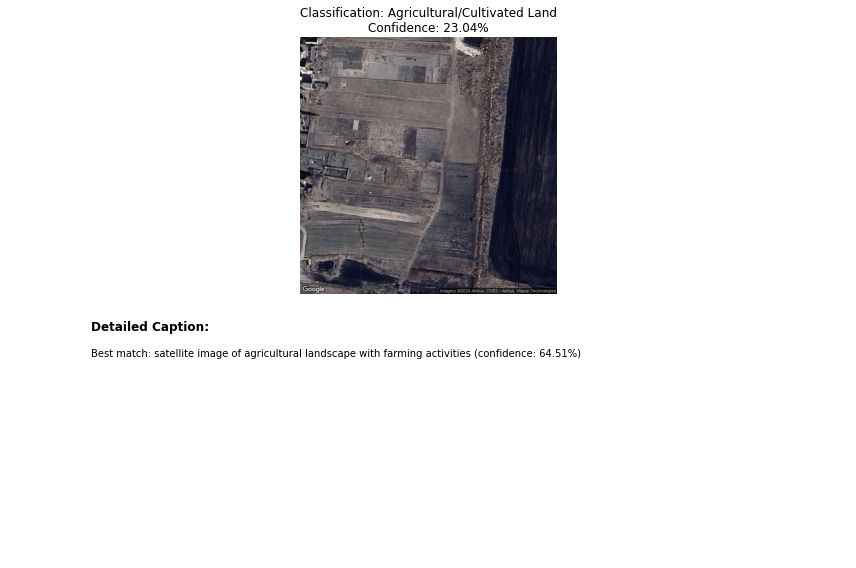

=== Processing image test_image\7c168f26-tile_0756_50.646345772257696_30.243084704654443.png ===

Loading image...
Analyzing image for agricultural content...

=== RESULTS ===
Classification: Agricultural/Cultivated Land
Confidence: 24.77%
Is Agricultural: True

Detailed Caption: Best match: satellite image of agricultural landscape with farming activities (confidence: 64.86%)


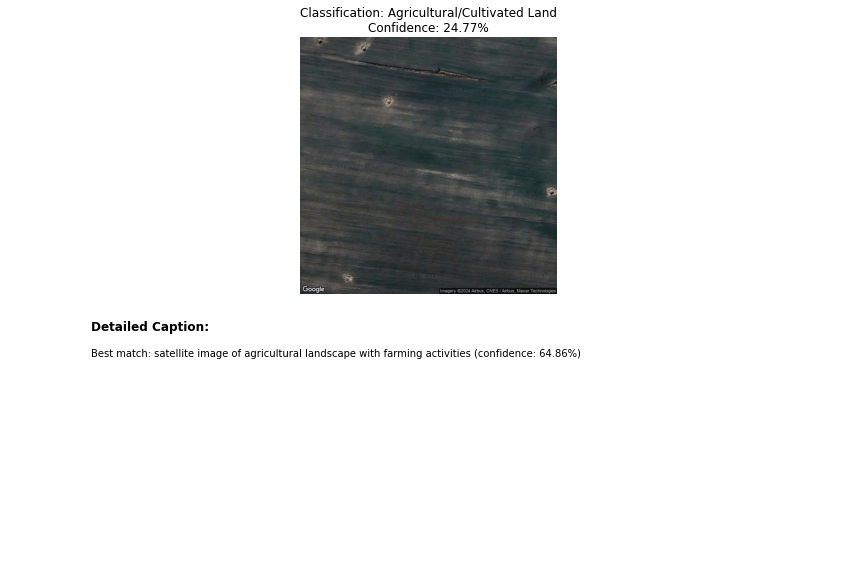

=== Processing image test_image\bc0aac68-tile_0398_50.68916477560756_30.212789083722647.png ===

Loading image...
Analyzing image for agricultural content...

=== RESULTS ===
Classification: Non-Agricultural Land
Confidence: 15.85%
Is Agricultural: False

Detailed Caption: Best match: satellite image of residential areas and suburban neighborhoods (confidence: 55.21%)


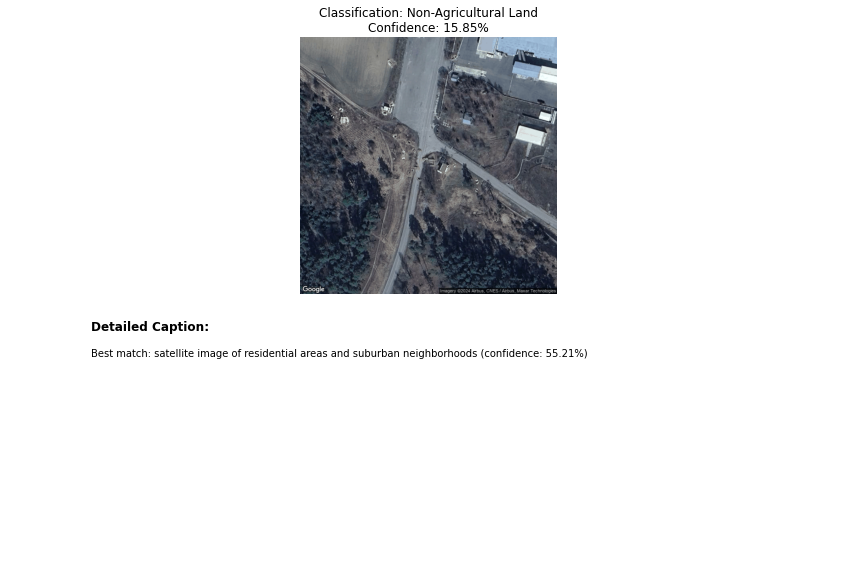

=== Processing image test_image\c3e0e6cf-tile_0378_50.646358023517855_30.212789083722647.png ===

Loading image...
Analyzing image for agricultural content...

=== RESULTS ===
Classification: Agricultural/Cultivated Land
Confidence: 24.61%
Is Agricultural: True

Detailed Caption: Best match: satellite image of agricultural landscape with farming activities (confidence: 63.74%)


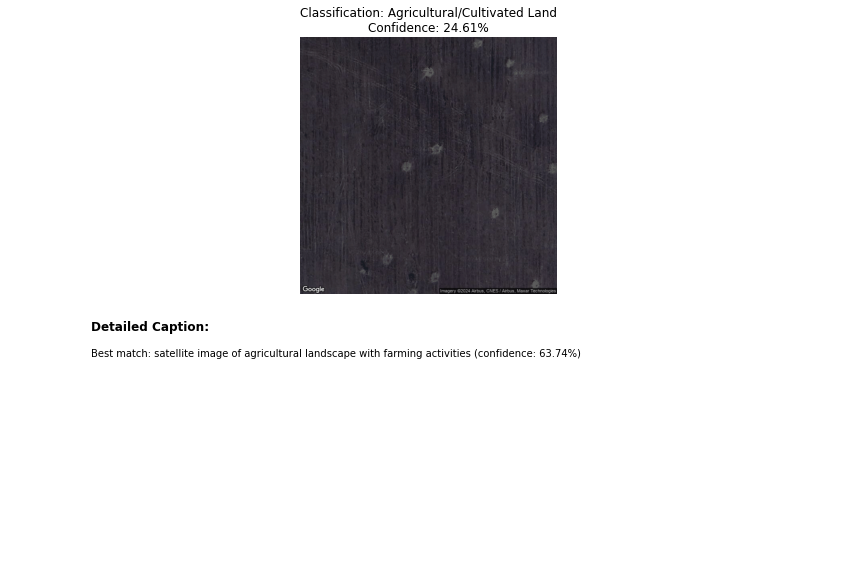

In [15]:
test_images = [os.path.join(IMG_DIR, fname) for fname in os.listdir(IMG_DIR)]



print("=== Agricultural Land Classification with Florence-2 ===\n")

for image_path in test_images:
    # Example with satellite imagery URLs (you can replace with your own images)

    print(f"=== Processing image {image_path} ===\n")

    # Example: Load and classify a single image
    try:
        # Replace this with your actual image path
        # image_path = input("Enter image path or URL (or press Enter to use demo): ").strip()

        if not image_path:
            print("Please upload an image to Colab and provide the path, or use a URL")
        else:
            # Load image
            print("Loading image...")
            image = load_image(image_path)

            # Classify using enhanced method
            print("Analyzing image for agricultural content...")
            results = enhanced_agricultural_detection(image)

            # Display results
            print(f"\n=== RESULTS ===")
            print(f"Classification: {results['classification']}")
            print(f"Confidence: {results['confidence']:.2%}")
            print(f"Is Agricultural: {results['is_agricultural']}")
            print(f"\nDetailed Caption: {results['detailed_caption']}")

            if results['found_keywords']:
                print(f"\nAgricultural keywords found: {', '.join(results['found_keywords'])}")

            if results.get('agricultural_objects'):
                print(f"Agricultural objects detected: {', '.join(results['agricultural_objects'])}")

            # Visualize results
            visualize_results(image, results)

    except Exception as e:
        print(f"Error processing image: {e}")
        print("\nTo use this notebook:")
        print("1. Upload your satellite image to Colab files")
        print("2. Provide the correct path (e.g., '/content/your_image.jpg')")
        print("3. Or use a direct URL to an online image")